In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import welsh_powell
import cs412_mingraphcolor_exact
import os


In [38]:
def get_exact_num(stream):
    pairs = [s.split() for s in stream[1:]]
    graph = cs412_mingraphcolor_exact.Graph(pairs)
    _, n_colors = graph.brute_force_color()
    return n_colors

In [39]:
def get_welsh_num(stream):
    pairs = [s.split() for s in stream[1:]]
    graph = welsh_powell.Graph(pairs)
    return graph.welshpowell()

In [40]:
parent = 'test_cases/random_graphs/'

files = os.listdir(parent)
full_files = [f'{parent}{file}' for file in files] # concat filepaths

In [33]:
# store which_K to (exact_#, welsh_#)
pairs = {}

for filepath in full_files:
    # which_K = int(filepath[filepath.index('K') + 1 : filepath.index('_', len('test_cases/complete_graphs/'), len(filepath))])
    which_K = int(filepath[len(parent):filepath.index('_', len(parent), len(filepath))])

    if which_K >= 2048:
        continue

    with open(filepath, 'r') as f:
        stream = f.readlines()
        pairs[which_K] = (get_exact_num(stream), get_welsh_num(stream))

print(pairs)

{730: (730, 730), 410: (410, 410), 31: (14, 31), 310: (310, 310), 920: (920, 920), 870: (870, 870), 42: (18, 42), 540: (540, 540), 240: (240, 240), 380: (380, 380), 480: (480, 480), 160: (160, 160), 660: (660, 660), 210: (210, 210), 47: (21, 47), 510: (510, 510), 820: (820, 820), 630: (630, 630), 39: (19, 39), 130: (130, 130), 580: (580, 580), 280: (280, 280), 760: (760, 760), 28: (13, 28), 970: (970, 970), 34: (15, 34), 340: (340, 340), 440: (440, 440), 370: (370, 370), 33: (14, 33), 470: (470, 470), 51: (23, 51), 190: (190, 190), 690: (690, 690), 940: (940, 940), 880: (880, 880), 750: (750, 750), 600: (600, 600), 100: (100, 100), 810: (810, 810), 40: (19, 40), 220: (220, 220), 520: (520, 520), 150: (150, 150), 650: (650, 650), 980: (980, 980), 570: (570, 570), 45: (21, 45), 270: (270, 270), 27: (14, 27), 840: (840, 840), 790: (790, 790), 910: (910, 910), 420: (420, 420), 36: (16, 36), 320: (320, 320), 700: (700, 700), 48: (19, 48), 960: (960, 960), 450: (450, 450), 46: (20, 46), 350:

In [44]:
# find bad pairs, i.e. pairs with differing elements
good = bad = 0
sum_good = sum_bad = 0
for K, (exact, welsh) in pairs.items():
    if exact != welsh:
        sum_bad += welsh
        bad += 1
    else:
        sum_good += exact
        good += 1

print('Matching results:', good)
print('Bad results:', bad)
sum_good, sum_bad

Matching results: 91
Bad results: 27


(50074, 1152)

In [53]:
# save the runtime next time idiot
import time
runtime = {}
for filepath in full_files:
    # which_K = int(filepath[filepath.index('K') + 1 : filepath.index('_', len('test_cases/complete_graphs/'), len(filepath))])
    which_K = int(filepath[len(parent):filepath.index('_', len(parent), len(filepath))])

    if which_K >= 2048:
        continue

    with open(filepath, 'r') as f:
        stream = f.readlines()
        t1 = time.time()
        get_exact_num(stream)
        t2 = time.time()
        runtime[which_K] = t2 - t1

In [55]:
# group runtime and pairs together, e.g. we want K : pass/fail true false

joined = {}

for K, r in runtime.items():
    if K not in pairs:
        print(f'{K} not in pairs')
    else:
        joined[K] = (r, pairs[K][0] == pairs[K][1])

print(joined)

{730: (7.368667840957642, True), 410: (1.1951229572296143, True), 31: (0.00043392181396484375, False), 310: (0.5418350696563721, True), 920: (14.317210912704468, True), 870: (12.141125202178955, True), 42: (0.0008089542388916016, False), 540: (2.7376129627227783, True), 240: (0.23503899574279785, True), 380: (0.9682822227478027, True), 480: (1.9280707836151123, True), 160: (0.0710439682006836, True), 660: (5.37492299079895, True), 210: (0.15695500373840332, True), 47: (0.0010838508605957031, False), 510: (2.29856014251709, True), 820: (10.423516988754272, True), 630: (4.626389980316162, True), 39: (0.0007269382476806641, False), 130: (0.03879714012145996, True), 580: (3.5390052795410156, True), 280: (0.39579200744628906, True), 760: (8.01518702507019, True), 28: (0.0003876686096191406, False), 970: (16.878340005874634, True), 34: (0.0005350112915039062, False), 340: (0.7129206657409668, True), 440: (1.4992098808288574, True), 370: (0.861534833908081, True), 33: (0.0005042552947998047, 

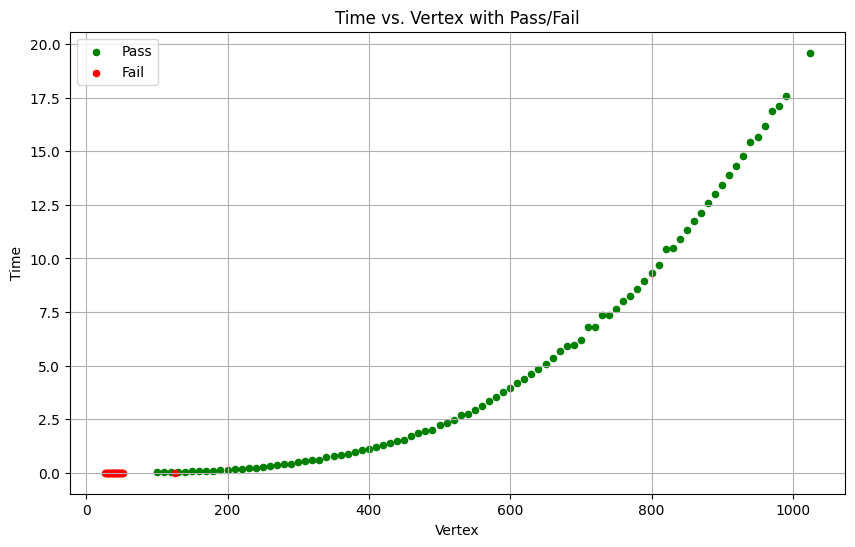

In [59]:
df = pd.DataFrame.from_dict(joined, orient='index', columns=['Time', 'Pass'])

passes = df[df['Pass'] == True]
fails = df[df['Pass'] == False]

plt.figure(figsize=(10, 6))

plt.scatter(passes.index, passes['Time'], color='green', label='Pass', s=20)
plt.scatter(fails.index, fails['Time'], color='red', label='Fail', s=20)

plt.xlabel('Vertex')
plt.ylabel('Time')
plt.title('Time vs. Vertex with Pass/Fail')
plt.legend()
plt.grid(True)

plt.show()